## <p style="text-align: right;"> &#9989; Nic Wiggins </p>

In order to successfully complete this assignment, you must follow all instructions in this notebook and upload your edited ipynb file with your answers on or before **11:59pm on Friday Apr. 5th**.

**BIG HINT:** Read the entire homework before starting.  

# Homework Assignment: Principal Component Analysis

<img src="https://i.stack.imgur.com/lNHqt.gif">
From: https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

### Outline for Homework 5

</p>

1. Utah Teapot Example
1. PCA in High Dimensional Space (Images as Vectors)
1. Picking the "best" Feature Vectors
1. Using PCA for Feature Selection in Machine Learning

----
# 1. Utah Teapot Example 

**NOTE:** The following code may not work on your computer. 
If there is a problem, work with your classmates.

https://sketchfab.com/models/1092c2832df14099807f66c8b792374d

&#9989;  <font color=red>** DO THIS:**</font> Pretend you own a teapot and you want to sell it on ebay. 
However, you only get to submit one picture. 
Use your mouse to rotate the teapot in the figure below to provide the "best" picture of the teapot. 
I.e. given a single 2D projection of the 3D object, what is the best angle to take a picture that best shows the shape of the teapot? 

In [1]:
# Display the associated webpage in a new window
import IPython
url = 'some url....'
iframe = '''<div class="sketchfab-embed-wrapper"><iframe width="640" height="480" src="https://sketchfab.com/models/1092c2832df14099807f66c8b792374d/embed" frameborder="0" allowvr allowfullscreen mozallowfullscreen="true" webkitallowfullscreen="true" onmousewheel=""></iframe>

<p style="font-size: 13px; font-weight: normal; margin: 5px; color: #4A4A4A;">
    <a href="https://sketchfab.com/models/1092c2832df14099807f66c8b792374d?utm_medium=embed&utm_source=website&utm_campain=share-popup" target="_blank" style="font-weight: bold; color: #1CAAD9;">The Utah Teapot</a>
    by <a href="https://sketchfab.com/3dgraphics?utm_medium=embed&utm_source=website&utm_campain=share-popup" target="_blank" style="font-weight: bold; color: #1CAAD9;">3D graphics 101</a>
    on <a href="https://sketchfab.com?utm_medium=embed&utm_source=website&utm_campain=share-popup" target="_blank" style="font-weight: bold; color: #1CAAD9;">Sketchfab</a>
</p>
</div>'''
IPython.display.HTML(iframe)

The following code downloads a "point cloud" version of the Utah teapot. 
Read more about this model from the following website: http://www.holmes3d.net/graphics/teapot/

In [2]:
from urllib.request import urlopen, urlretrieve

url = 'http://www.holmes3d.net/graphics/teapot/teapotCGA.bpt'
file = 'teapotCGA.bpt'

urlretrieve(url, file);

Click on the following link to see the contents of the ```bpt``` file. 
Note, most of the file contains 3d points in $(x,y,z)$ coordinates.  

http://www.holmes3d.net/graphics/teapot/teapotCGA.bpt

The rest of the file contains information about how the points are connected to generate a triagular mesh. 
For this assignment, let's just look at the points. 
The following code opens the file and reads any line with 3 values as an $(x,y,z)$ point:

In [3]:
# Read in the file

import sympy as sym
import numpy as np
sym.init_printing()

# open the file for reading
filehandle = open(file, 'r')  
points = []
while True:  
    # read a single line
    line = filehandle.readline()
    if not line:
        break
    coords = line.split()
    if len(coords) == 3:
        point = []
        for c in coords:
            c = float(c)
            point.append(c)
        points.append(point)

# close the pointer to that file
filehandle.close()  

#convert the points to a numpy array
points = np.array(points).T

P = np.matrix(points)


Plot the 3D points

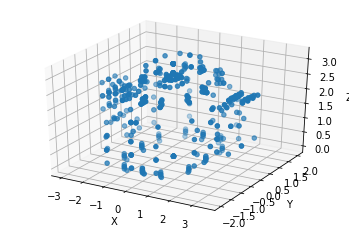

In [4]:
# Plot the points in 3D 

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(points[0,:], points[1,:], points[2,:])

ax.set_xlabel('X');
ax.set_ylabel('Y');
ax.set_zlabel('Z');

&#9989;  <font color=red>** DO THIS:**</font> Plot the points in 2D. 
The following is a simple projection onto the $(x,y)$ plane. 
Change the numbers in the following code to view the plot from other angles:

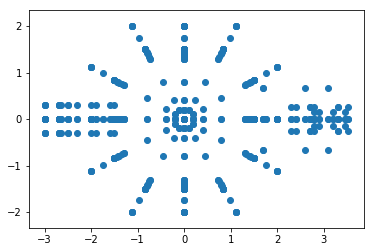

In [5]:
plt.scatter(points[0,:],points[1,:]);
plt.axis('equal');

## Manually Calculate PCA

Now let's calculate the principal components using the following steps. Recall in the first midterm exam, we started a simple version of PCA.

### Step 1: Center the data
Move all 512 points in $P$ such that the average points is the original (0,0,0) in 3d.

True


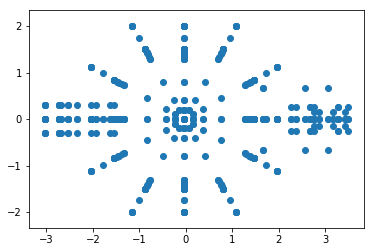

In [6]:
#####Start your code here #####
A = np.array([points[0,:]-np.mean(points[0,:]),points[1,:]-np.mean(points[1,:]),points[2,:]-np.mean(points[2,:])])
print(np.allclose(A.mean(axis=1) ,0) )
plt.scatter(np.array(A[0,:]),np.array(A[1,:]));
plt.axis('equal');
#####End of your code here#####

### Step 2: Create the covariance matrix $AA^\top$

&#9989;  <font color=red>** DO THIS:**</font> Calculate the Covariance matrix $C$ from $A$

In [7]:
#####Start your code here #####
C = np.matmul(A,A.T)
#####End of your code here#####

### Step 3: Calculate the eigenvalues and eigenvectors of $C$

&#9989;  <font color=red>** DO THIS:**</font> Calculate the eigenvalues and eigenvectors of $C$. Call the variables ```vals``` and ```vecs```.

In [8]:
#####Start your code here #####
vals, vecs = np.linalg.eig(C)
#####End of your code here#####

### Step 4: Sort the eigenvectors in terms of eigenvalues (from biggest to smallest)

&#9989;  <font color=red>** DO THIS:**</font> Sort the eigenvectors by their eigenvalues (biggest to smallest).

In [9]:
#####Start your code here #####
idx = vals.argsort()[::-1]   
vals = vals[idx]
vecs = vecs[:,idx]
#####End of your code here#####

### Step 5: Transform original points into the basis coordinates.  
Remember that the eigenvectors form a basis and the vectors returned by ```numpy``` are already normalized. 
In fact the vectors are already returned as a matrix such that:

In [10]:
B = vecs
sym.Matrix(B)

⎡ -0.995165460198742      0.098212559417957    1.44453109407685e-16 ⎤
⎢                                                                   ⎥
⎢-2.42193260916578e-17  -2.05238273670705e-15           1.0         ⎥
⎢                                                                   ⎥
⎣ -0.098212559417957     -0.995165460198742    -1.80061100717172e-15⎦

Remember that the basis transformation matrix does the following conversion:

$$P = BP_b$$

We want to calculate $P_b$ under the new basis, so we need to invert $B$:

$$P_b = B^{-1}P$$

NOTE: Since our matrix $C$ is symmetric, the basis vectors $B$ constructed from eigenvectors are orthonormal. So the following is also true:

$$P_b = B^\top P$$

Or. in code

In [11]:
#####Start your code here #####
Pw = B.T*P
#####End of your code here#####

### Step 6: Visualize the final results

Plot the first and second dimensions of the newly transferred points. 
This should be our first and second basis vectors. 

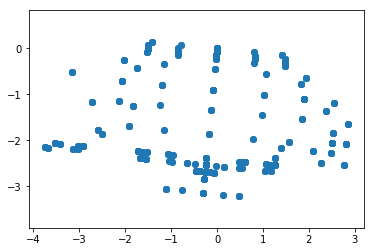

In [12]:
plt.scatter(np.array(Pw[0,:]),np.array(Pw[1,:]));
plt.axis('equal');

### Do it again... but faster

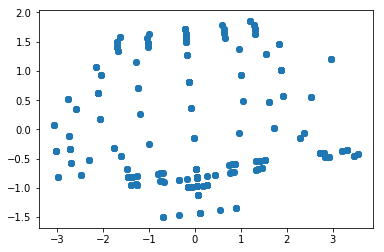

In [13]:
from sklearn.decomposition import PCA

#Steps 1-4
pca = PCA()
pca.fit(P.T)

#Step 5
pca_points = pca.transform(P.T)

#Step 6
plt.scatter(pca_points[:,0],pca_points[:,1])

Why is the above image upside down? Let's look at the two transformation matrices?

In [14]:
pca.components_

array([[ 9.95165460e-01, -0.00000000e+00,  9.82125594e-02],
       [ 9.82125594e-02, -0.00000000e+00, -9.95165460e-01],
       [ 0.00000000e+00, -1.00000000e+00,  2.22044605e-16]])

In [15]:
vecs.T

array([[-9.95165460e-01, -2.42193261e-17, -9.82125594e-02],
       [ 9.82125594e-02, -2.05238274e-15, -9.95165460e-01],
       [ 1.44453109e-16,  1.00000000e+00, -1.80061101e-15]])

&#9989;  <font color=red>** QUESTION:**</font> What is different between these two transforms? Do these differences matter? Why or why not?

pcs.components_ has a negative first row which is a reflection about the x axis, and the negative of the third row which is a reflection about the z axis. These differences do not matter, its just how the image is stored. No matter which reflection, both show the 2D image that corresponds with the most data from the 3D model.

---
# 2. PCA in High Dimensional Space (Images as Vectors)


The faces in the wild dataset is often used to test face recognition algorithms. 
The Sklearn library comes with a function to download the dataset. 


&#9989;  <font color=red>** DO THIS:**</font> Run the following code to download the faces in the wild dataset.


**NOTE** This may take some time

In [16]:
#Import the data from scikit-learn
import numpy as np
from sklearn.datasets import fetch_lfw_people, load_digits

sk_data = fetch_lfw_people(min_faces_per_person=50, resize=0.4)

feature_vectors = sk_data.data
class_labels = sk_data.target
categories = sk_data.target_names
n_samples, n_features = feature_vectors.shape
N, h, w = sk_data.images.shape
n_classes = len(categories)

The ```sk_data``` structure has a couple of interesting components:

- data - Raw image data (stored as vectors)
- target - name of the person in the image (stored as a number)
- categories - lookup table for people's name (number to name)

Use the following to view the data.

In [17]:
%matplotlib inline
import matplotlib.pylab as plt
from ipywidgets import interact

def browse_images(images, labels, categories):
    n = len(images)
    def view_image(i):
        plt.imshow(images[i], cmap=plt.cm.gray, interpolation='nearest')
        plt.title('%s' % categories[labels[i]])
        plt.axis('off')
        plt.show()
    interact(view_image, i=(0,n-1))
browse_images(sk_data.images, sk_data.target, sk_data.target_names)

interactive(children=(IntSlider(value=779, description='i', max=1559), Output()), _dom_classes=('widget-intera…

Let's consider the ```feature_vector``` matrix. 
Each row of the matrix represents a different person (so there are 1560 people in the dataset) and each column represents a different feature (in this case, there are $h\times w$ features or one feature for each pixel). 

In [18]:
feature_vectors.shape

In [19]:
print('rows=',h,'columns=',w,'pixels=',h*w)

rows= 50 columns= 37 pixels= 1850


Let's define our ```numpy``` matrix $A$ to just be the ```feature_vectors```:

In [20]:
A = np.matrix(feature_vectors)

## PCA Algorithm

- STEP 1: Center the Data
- STEP 2: Create the covariance matrix $AA^\top$
- STEP 3: Calculate the eigenvalues and eigenvectors of $C$
- STEP 4: Sort the eigenvectors in terms of eigenvalues (from biggest to smallest)
- STEP 5: Transform original points into the basis coordinates.  
- STEP 6: Visualize the final results

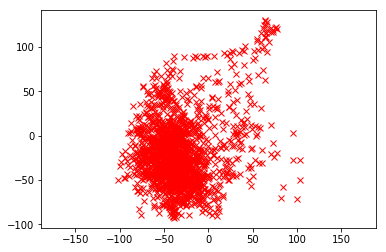

In [21]:
# STEP !: Center the Data 
mean_face = A.mean(axis=0)

A2 = A - mean_face

#Plot the first two values (Currently these don't mean much)
plt.plot(A2[0].tolist(), A2[1].tolist(), 'x', color='r');
plt.axis('equal');

We can visualize the "mean face" by turning it back into a 2D matrix and using the imshow function:

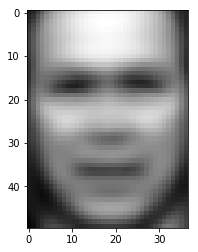

In [22]:
plt.imshow(mean_face.reshape((h, w)), cmap=plt.cm.gray)

&#9989;  <font color=red>** DO THIS:**</font> Pick one of the images.  

In [23]:
#####Start your code here #####
image_num = 234
#####End of your code here#####

In [24]:
##ANSWER##
#####Start your code here #####
image_num = 1174
#####End of your code here#####
##ANSWER##

Visualize the image as a combination of the mean plus some remainder.

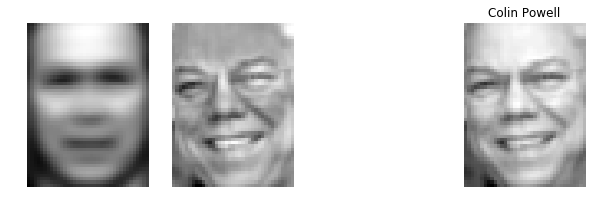

In [25]:
remainder = feature_vectors[image_num]-mean_face

fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(141)
ax.imshow(mean_face.reshape((h, w)), cmap=plt.cm.gray)
ax.axis('off')

ax = fig.add_subplot(142)
ax.imshow(remainder.reshape((h, w)), cmap=plt.cm.gray)
ax.axis('off')

ax = fig.add_subplot(144)
ax.imshow(feature_vectors[image_num].reshape((h, w)), cmap=plt.cm.gray)
ax.set_title(categories[class_labels[image_num]])
ax.axis('off');

## Let's just use SciKit Learn instead (it's faster and easier)

The above calculation is hard to do when our vectors are really big. 
There are a lot of things that can slow down the code. 
Fortunately, the ```PCA``` function in ```sklearn``` is optimized, so that we only do the minimum work we need. 
Consider the following code which only finds the top ```n_components``` of the PCA solution:

In [26]:
%%time 

#STEPS 1-4

from sklearn.decomposition import PCA

n_components = 4 # This is much less than the original n_features

print("Extracting the top %d eigenfaces from %d faces" % (n_components, A.shape[0]))

#Set up the pca object with the number of compoents we want to find
pca = PCA(n_components=n_components)

#Fit the training data to the pca model.
pca.fit(A)

Extracting the top 4 eigenfaces from 1560 faces
CPU times: user 228 ms, sys: 19.2 ms, total: 248 ms
Wall time: 127 ms


In [27]:
#STEP 5
pca_faces = pca.transform(A)

What shape is our transformation matrix?

In [28]:
pca.components_.shape

### STEP 6: Visualize the final results

In [29]:
pca_faces[image_num]

array([-911.9904  , -356.16403 ,  -14.924156, -252.54071 ], dtype=float32)

The above values represent a linear combination of the top eigenvectors calculated by PCA for the image you selected. 
The ```pca.components_``` variable is a list of our top eigenvectors. 
For example, let's look at the eigenvector corresponding to the larges eigenvalue:

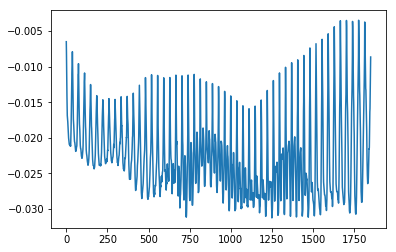

In [30]:
eigen_vector = pca.components_[0]

plt.plot(eigen_vector)

Since the eigenvector is in $R^{1850}$, we can use the same "trick" to transform it into an image as we used for the mean image. This is often referred to as the "Eigenface".

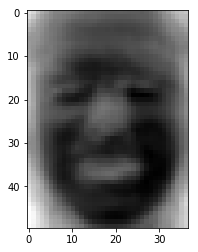

In [31]:
plt.imshow(eigen_vector.reshape((h, w)), cmap=plt.cm.gray)

Let's try to visualize the original face as a linear combination of the four eigenvectors (and the mean image):

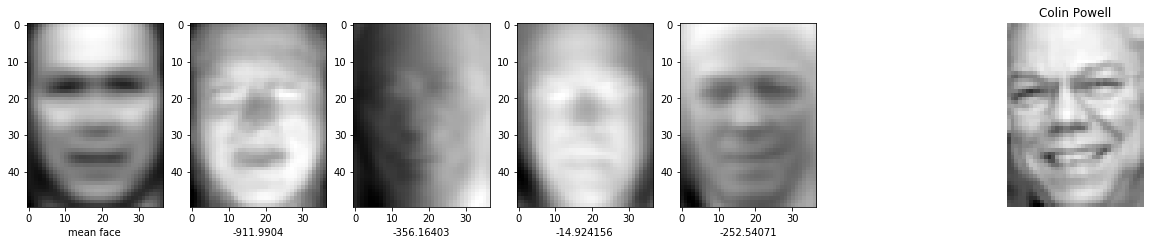

In [32]:
pca_vec = pca_faces[image_num]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(171)
ax.imshow(mean_face.reshape((h, w)), cmap=plt.cm.gray)
ax.set_xlabel('mean face')

ax = fig.add_subplot(172)
ax.imshow((pca_vec[0]*pca.components_[0]).reshape((h, w)), cmap=plt.cm.gray)
ax.set_xlabel(pca_vec[0])

ax = fig.add_subplot(173)
ax.imshow((pca_vec[1]*pca.components_[1]).reshape((h, w)), cmap=plt.cm.gray)
ax.set_xlabel(pca_vec[1])

ax = fig.add_subplot(174)
ax.imshow((pca_vec[2]*pca.components_[2]).reshape((h, w)), cmap=plt.cm.gray)
ax.set_xlabel(pca_vec[2])

ax = fig.add_subplot(175)
ax.imshow((pca_vec[3]*pca.components_[3]).reshape((h, w)), cmap=plt.cm.gray)
ax.set_xlabel(pca_vec[3])



ax = fig.add_subplot(177)
ax.imshow(feature_vectors[image_num].reshape((h, w)), cmap=plt.cm.gray)
ax.set_title(categories[class_labels[image_num]])
ax.axis('off');

We though out a lot of information when we reduced the face representation to four values. 
The following code reconstructs the face as a linear combination of the eigenvectors and the mean face:

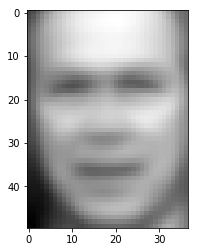

In [33]:
##Reconstruct the face from the mean_face and a linear combination of the eigenfaces.

new_image = mean_face.copy()

for i in range(len(pca.components_)):
    new_image += pca_vec[i]*pca.components_[i]
plt.imshow(new_image.reshape((h, w)), cmap=plt.cm.gray)

# 3. Picking the "best" Feature Vectors
The PCA algorithm finds a transform of the data such that the first component contains the "most" information, the second component contains the "second most" important information. 
How much information each component contains is actually included in the ```pca``` object and can be expressed as a ratio from 0 (no information) to 1 (all information). 
Let's plot these values below:

In [40]:
%%time 

from sklearn.decomposition import PCA

n_components = 55 # This is much less than the original n_features

print("Extracting the top %d eigenfaces from %d faces" % (n_components, A.shape[0]))

#Set up the pca object with the number of compoents we want to find
pca = PCA(n_components=n_components)

#Fit the training data to the pca model.
pca.fit(A)

Extracting the top 55 eigenfaces from 1560 faces
CPU times: user 373 ms, sys: 5.84 ms, total: 379 ms
Wall time: 198 ms


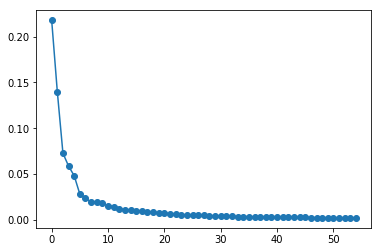

In [41]:
#Lets plot the variance of the eigen values
plt.plot(pca.explained_variance_ratio_, marker="o");

Another way to look at this is we can sum up the total ratios and see how much our new set of features represents the "variance" in the original data:

In [42]:
total_variance = np.sum(pca.explained_variance_ratio_)*100
print("These %d eigenvectors account for a total of %d percent of the total variance in the original dataset"
      % (n_components, total_variance))


These 55 eigenvectors account for a total of 86 percent of the total variance in the original dataset


&#9989;  <font color=red>** QUESTION:**</font> How many components would we need to represent 90% of the variance in our original data? (Hint: modify the above code and change ```n_components``` to find a total_variance > 90)

77

Let's visualize the result as a linear combination of the 55 eigenvectors and the mean face:

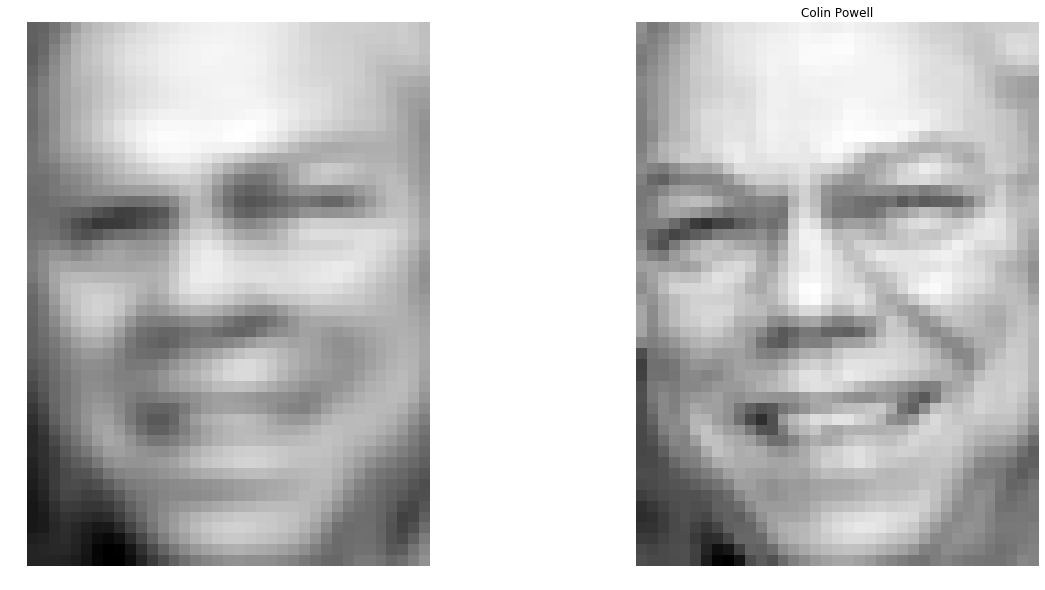

In [43]:
new_image = mean_face.copy()

#Transform our face using the latest ```n_components```
pca_vec = pca.transform(A[image_num])[0]

#Loop over n_components
for i in range(len(pca.components_)):
    new_image += pca_vec[i]*pca.components_[i]

#Reshape and plot new image
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121)
ax.imshow(new_image.reshape((h, w)), cmap=plt.cm.gray)    
ax.axis('off');

ax = fig.add_subplot(122)
ax.imshow(feature_vectors[image_num].reshape((h, w)), cmap=plt.cm.gray)
ax.set_title(categories[class_labels[image_num]])
ax.axis('off');

&#9989;  <font color=red>** DO THIS:**</font> Calculate the difference between the reconstructed image and the original image. 
Display the difference as an image. 
Include a ```colorbar``` and select a colormap other than gray to better see the difference.

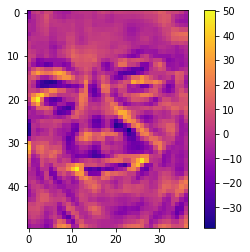

In [44]:
#####Start your code here #####
difference = new_image - feature_vectors[image_num]
plt.imshow(difference.reshape((h, w)), cmap="plasma")
plt.colorbar()
#####End of your code here#####

&#9989;  <font color=red>** DO THIS:**</font> Estimate the error of the reconstruction by calculate the average of the absolute value of the difference at all pixels (Note, this should be a single scalar value):

In [45]:
#####Start your code here #####
error = np.mean(np.absolute(difference))
error
#####End of your code here#####

8.048565

# 4. Using PCA for Feature Selection in Machine Learning

Now let's consider a real world example, where we use PCA to "select" the most descriptive components of an image for Machine Learning.

**NOTE:** We are using the "whitening" option for PCA.  This makes the variance between features equal. For more information see:   http://mccormickml.com/2014/06/03/deep-learning-tutorial-pca-and-whitening/

### STEP A - Split into training and testing set
Let's set aside some of the data for training and some of the data for testing.  Scikit learn has a function for that.

In [46]:
from sklearn.model_selection import train_test_split

# STEP A - Feature Extraction
images = sk_data.images
categories = sk_data.target_names
class_labels = sk_data.target
feature_vectors = sk_data.data
feature_vectors.shape

full_train_vectors, full_test_vectors, train_labels, test_labels = train_test_split(feature_vectors, class_labels, test_size=0.25)

&#9989;  <font color=red>** Question:**</font>  In machine learning, why is it important to split the data into a training and testing set? And why do we calculate the principal conponents on the training data only?

If you train with all the data you have nothing to test on. Training on all the data is not realistic, since the model will be trained then put in the real world and used, this performance is seen through the test data set. You can fit the training data very well, or even over fit and have poor performance when testing in real world.

### Step B - Feature Selection using PCA

To train a model, we will first reduce the dimensionality of the original picture to a PCA space. This is often called unsupervised feature extraction.

In [47]:
#Outline for Homework 4%%time 
from sklearn.decomposition import PCA

n_components = 135 # This is much less than the original n_features
print("Extracting the top %d eigenfaces from %d faces" % (n_components, full_train_vectors.shape[0]))
pca = PCA(n_components=n_components, whiten=True)
pca.fit(full_train_vectors)


Extracting the top 135 eigenfaces from 1170 faces


PCA(copy=True, iterated_power='auto', n_components=135, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [48]:
pca.components_.shape

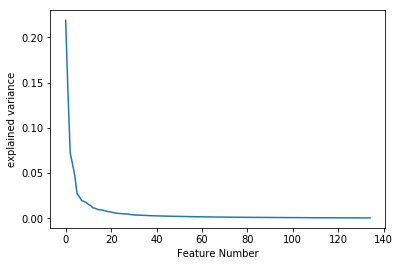

In [49]:
# Explained Variance for each feature
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Feature Number')
plt.ylabel('explained variance');

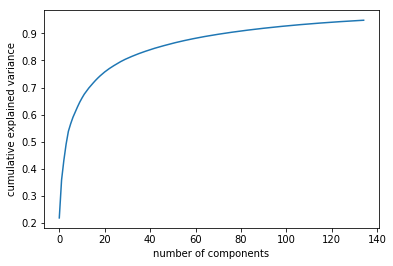

In [50]:
#quick graph to try to show how much variance is in each feature.

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Notice that the length of these new vectors are the same size as the original data. Let's plot the gallery of the most significant eigenfaces:

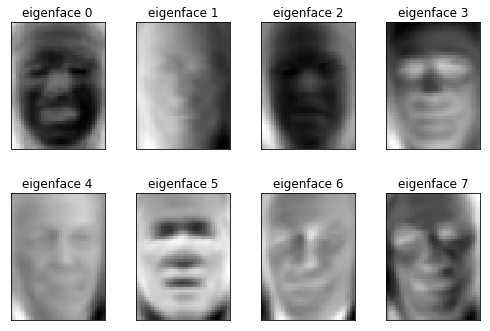

In [51]:
eigenfaces = pca.components_.reshape((n_components, h, w))
def plot_gallery(images, titles, h, w, n_row=3, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w, n_row=2, n_col=4)

In [52]:
train_vectors = pca.transform(full_train_vectors)
test_vectors = pca.transform(full_test_vectors)

print("Training set changed from a size of: ", full_train_vectors.shape, ' to: ', train_vectors.shape)
print("Testing set changed from a size of: ", full_test_vectors.shape, ' to: ', test_vectors.shape)

Training set changed from a size of:  (1170, 1850)  to:  (1170, 135)
Testing set changed from a size of:  (390, 1850)  to:  (390, 135)


### Step C: Train an SVM Classifier based on the training dataset.

In [53]:
%%time 

###############################################################################
# STEP C - Select and train a Classifier using the training dataset.
###############################################################################

# Train a SVM classification model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
print("Fitting the classifier to the training set")
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(train_vectors, train_labels)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set


/Users/nicwiggins/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
CPU times: user 30.8 s, sys: 251 ms, total: 31.1 s
Wall time: 32.4 s


### Step D: Show the results of the classification on the testing dataset.

In [54]:
# STEP D - Show the results of the classification on the testing dataset

from sklearn.metrics import classification_report, confusion_matrix

pred_labels = clf.predict(test_vectors)

print(classification_report(test_labels, pred_labels));
print(confusion_matrix(test_labels, pred_labels, labels=range(len(categories))));

              precision    recall  f1-score   support

           0       0.87      0.68      0.76        19
           1       0.79      0.89      0.84        61
           2       0.80      0.67      0.73        30
           3       0.77      0.97      0.86       130
           4       1.00      0.77      0.87        22
           5       1.00      0.83      0.91        18
           6       1.00      0.33      0.50        15
           7       0.82      0.60      0.69        15
           8       0.83      0.59      0.69        17
           9       1.00      0.85      0.92        13
          10       0.83      0.62      0.71         8
          11       0.81      0.81      0.81        42

   micro avg       0.82      0.82      0.82       390
   macro avg       0.88      0.72      0.77       390
weighted avg       0.83      0.82      0.81       390

[[ 13   2   1   2   0   0   0   0   0   0   1   0]
 [  0  54   1   6   0   0   0   0   0   0   0   0]
 [  0   2  20   8   0   0   0  

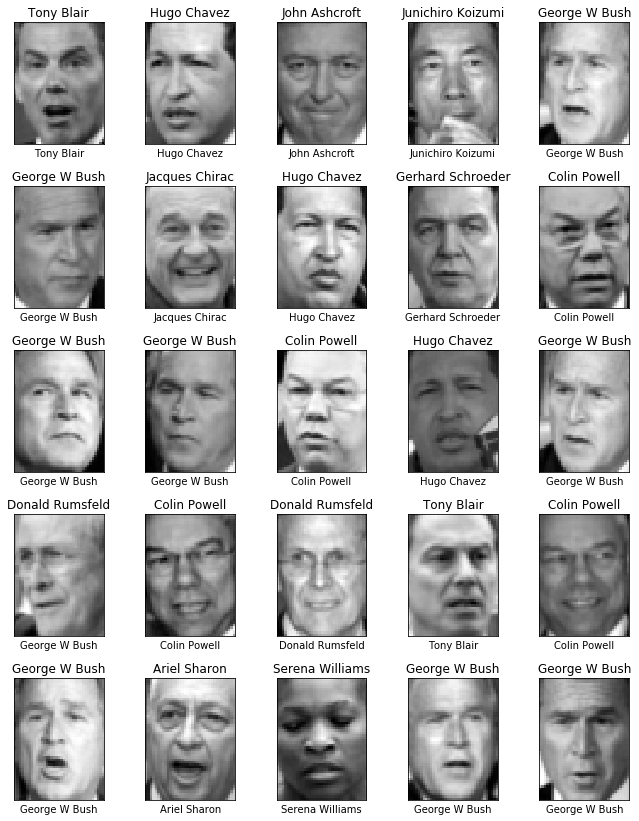

In [55]:
def plot_gallery(images, true_titles, pred_titles, h, w, n_row=5, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        #plt.title([true_titles[i],pred_titles[i]], size=12)
        plt.title(categories[true_titles[i]])
        plt.xlabel(categories[pred_titles[i]])
        plt.xticks(())
        plt.yticks(())

plot_gallery(full_test_vectors, test_labels, pred_labels, h,w)

&#9989;  <font color=red>** DO THIS:**</font>  Adding more eigenfaces should improve recognition.  Can you find a number that will get the precision and recall above 90%?

No, I cannot get above 90% precision/recall. Highest I was able to go was 135 eigenfaces giving 81% weighted avg precision and 80% weighted avg recall. Above 135 these values began to decrease, down to around 50% at 1000 eigenfaces. 

&#9989;  <font color=red>** QUESTION:**</font>  What happens if you turn off whitening in the above example? Why does this happen?

Precision and recall drop, thinks everyone is George W Bush. Whiting makes the features less correlated to each other, and gives all the features the same variance. Since the features are correlated, it is harder to distinguish which feature is actually being represented. 

-----
### Congratulations, we're almost done!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for the homework's dropbox (Don't forget to add your names in the first cell).


&#169; Copyright 2018,  Michigan State University Board of Trustees